In [1]:
import pandas as pd
import numpy as np
import pickle
import torch
from torch_geometric.loader import DataLoader
from modules.utils_data import get_graphs, default_properties as props
from modules.utils_plotting import plot_scatters

In [2]:
# Load graphs
test = pd.read_csv("test.csv")
test_graphs = get_graphs(test,dash_charges=True,scaled =True, test=True, save_graphs=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

Loading previously created graphs


In [3]:
# Load model
model = torch.load('model_full_test.pt')
model = model.to(torch.device('cuda'))
predictions = []
targets = []
smiles = []
for data in test_loader:
    smiles.extend(data.smiles)
    targets.extend(data.y.cpu().detach().numpy())
    # Forward pass on gpu
    data = data.to(torch.device('cuda'))
    out = model(data.x, data.edge_index, data.edge_attr,data.batch)
    # Move back to cpu and fill predictions
    predictions.extend(out.cpu().detach().numpy())

In [4]:
df_preds = pd.DataFrame(predictions, columns=props)
df_targets = pd.DataFrame(targets, columns=props)
df_preds['smiles'] = smiles
df_targets['smiles'] = smiles

In [5]:
# Unscale (optional)
scaler = pickle.load(open('scaler.pkl', 'rb'))
for df in [df_preds,df_targets]:
    df.replace(-1, np.nan, inplace=True)
    df[props] = scaler.inverse_transform(df[props])

In [6]:
# MAE per property
for prop in props:
    print(f'{prop} MAE: {np.abs(df_preds[prop]-df_targets[prop]).mean()}')

LogVP MAE: 24.4996337890625
LogP MAE: 6.796644687652588
LogOH MAE: 9.33838939666748
LogBCF MAE: 7.417608261108398
LogHalfLife MAE: 3.5442826747894287
BP MAE: 432.9343566894531
Clint MAE: 15.924753189086914
FU MAE: 1.0782415866851807
LogHL MAE: 15.894967079162598
LogKmHL MAE: 5.223912715911865
LogKOA MAE: 17.109289169311523
LogKOC MAE: 8.332099914550781
MP MAE: 527.871826171875
LogMolar MAE: 17.199480056762695


Property: LogVP
kendall_tau: 0.3680251811597904
rmse_overall: 25.35503578186035
mae_overall: 24.4996337890625
within_03_overall: 0.0
within_1_overall: 0.0
R2: -50.839813202556776
Pearson: 0.4742453963673298


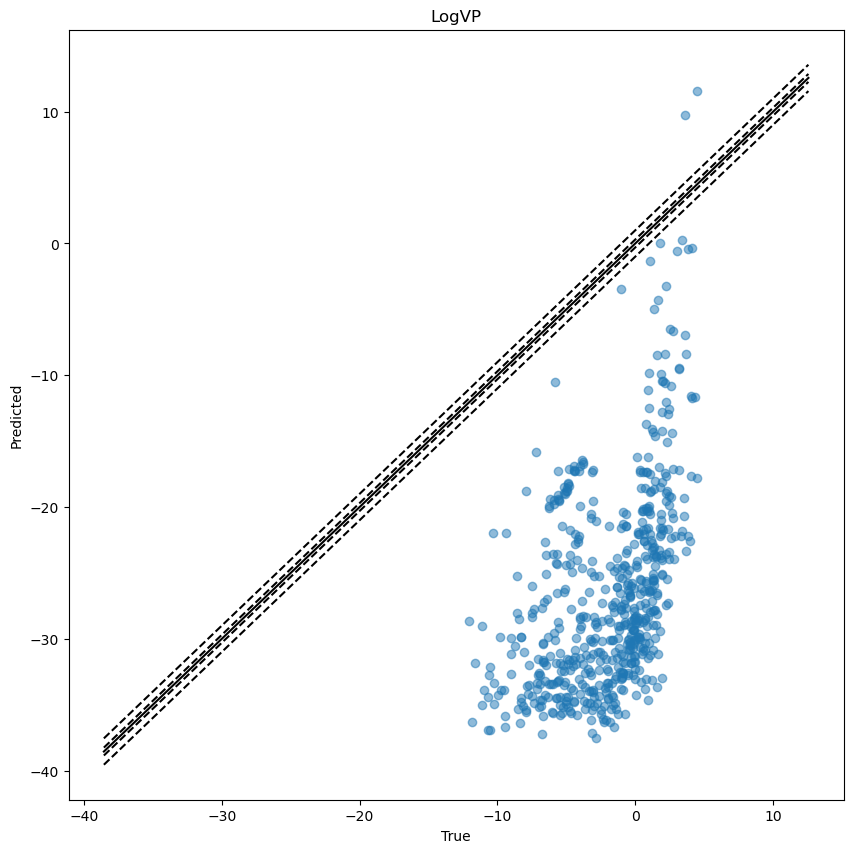

Property: LogP
kendall_tau: 0.017420065629170003
rmse_overall: 8.570520401000977
mae_overall: 6.796644687652588
within_03_overall: 0.02575107296137339
within_1_overall: 0.0890557939914163
R2: -21.47381943567743
Pearson: 0.029926257348825744


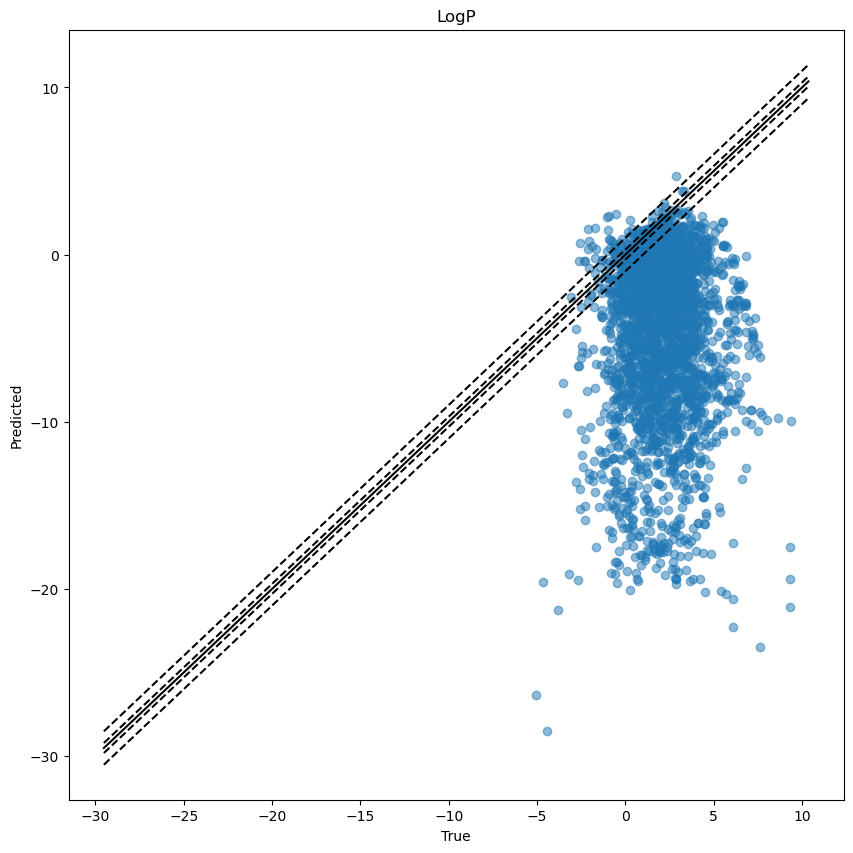

Property: LogOH
kendall_tau: -0.14652497048059504
rmse_overall: 9.750568389892578
mae_overall: 9.338390350341797
within_03_overall: 0.0
within_1_overall: 0.012048192771084338
R2: -64.9212251296895
Pearson: -0.2290220943854961


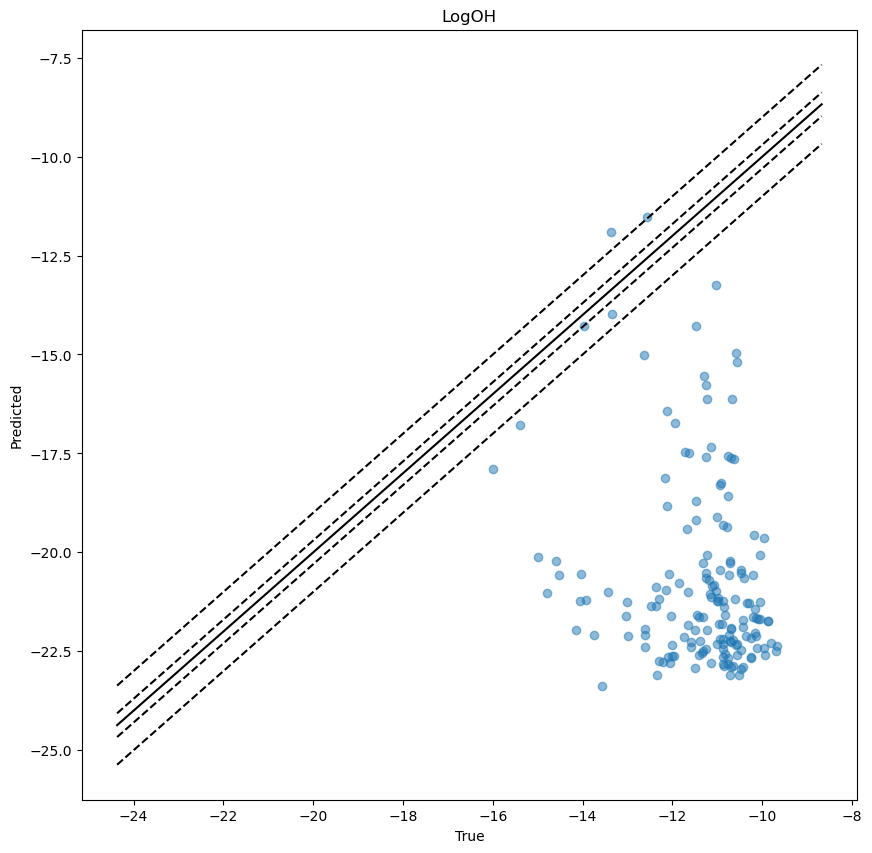

Property: LogBCF
kendall_tau: 0.07114906088248311
rmse_overall: 7.613636016845703
mae_overall: 7.417606830596924
within_03_overall: 0.0
within_1_overall: 0.0
R2: -39.28786629656204
Pearson: 0.24646319243370077


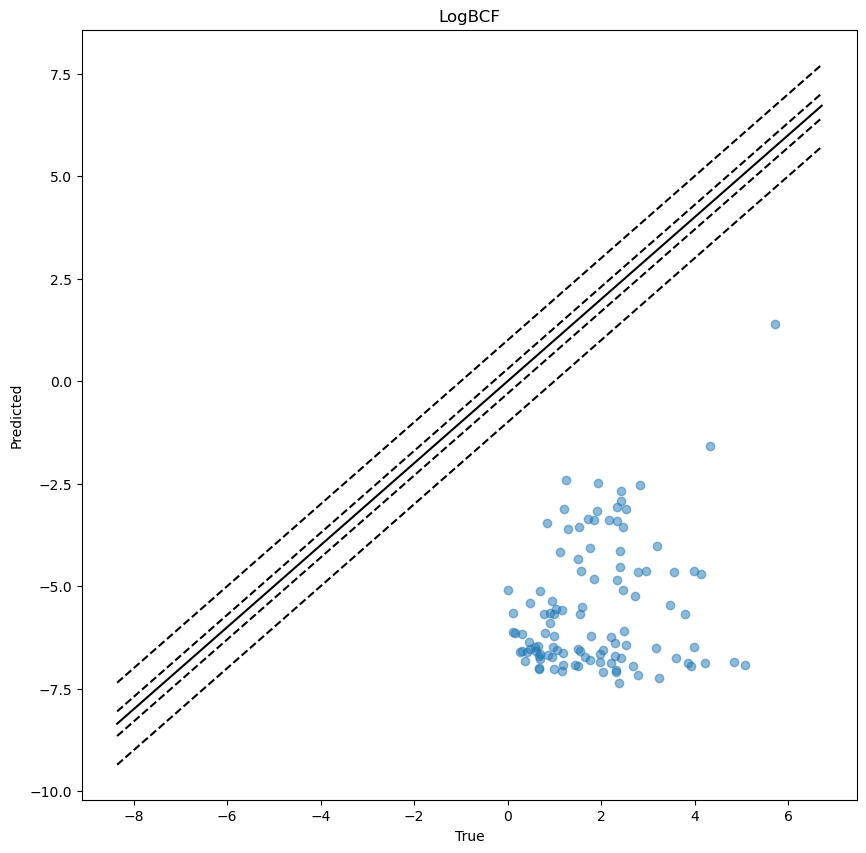

Property: LogHalfLife
kendall_tau: -0.18294404740157313
rmse_overall: 3.6694424152374268
mae_overall: 3.5442826747894287
within_03_overall: 0.0
within_1_overall: 0.0
R2: -19.760995680596412
Pearson: -0.2791624581372317


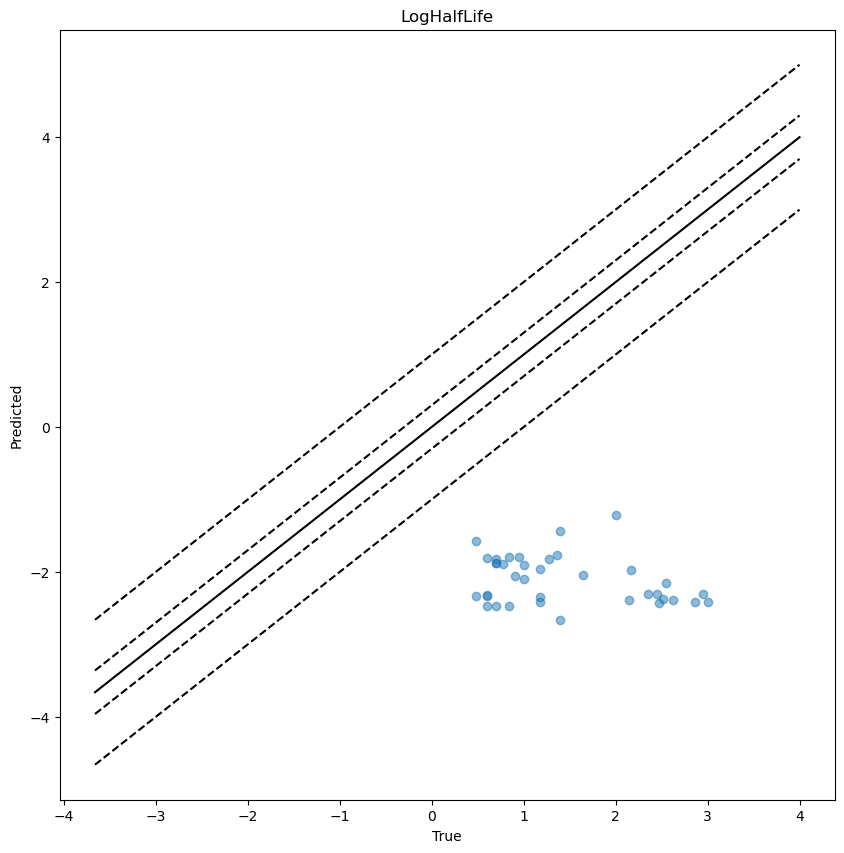

Property: BP
kendall_tau: -0.475334118257818
rmse_overall: 562.5394287109375
mae_overall: 432.93438720703125
within_03_overall: 0.0
within_1_overall: 0.0008857395925597874
R2: -39.41803412907163
Pearson: -0.6545862434818102


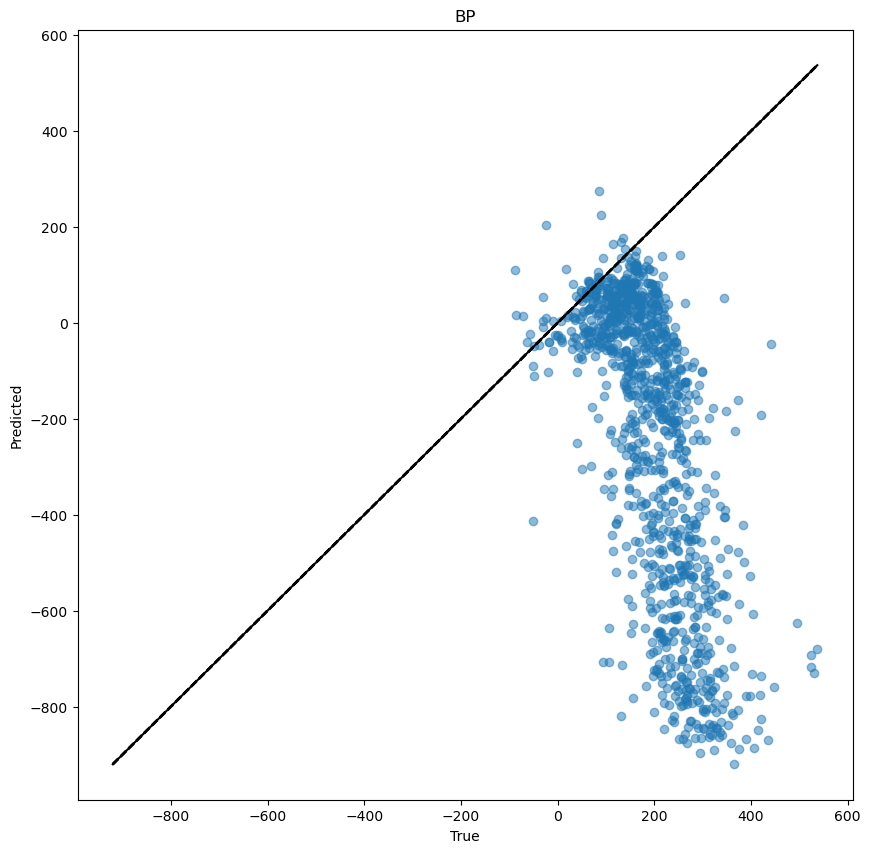

Property: Clint
kendall_tau: 0.08240962608331169
rmse_overall: 16.24665641784668
mae_overall: 15.924753189086914
within_03_overall: 0.0
within_1_overall: 0.0
R2: -24.180929334545333
Pearson: 0.18020395369881775


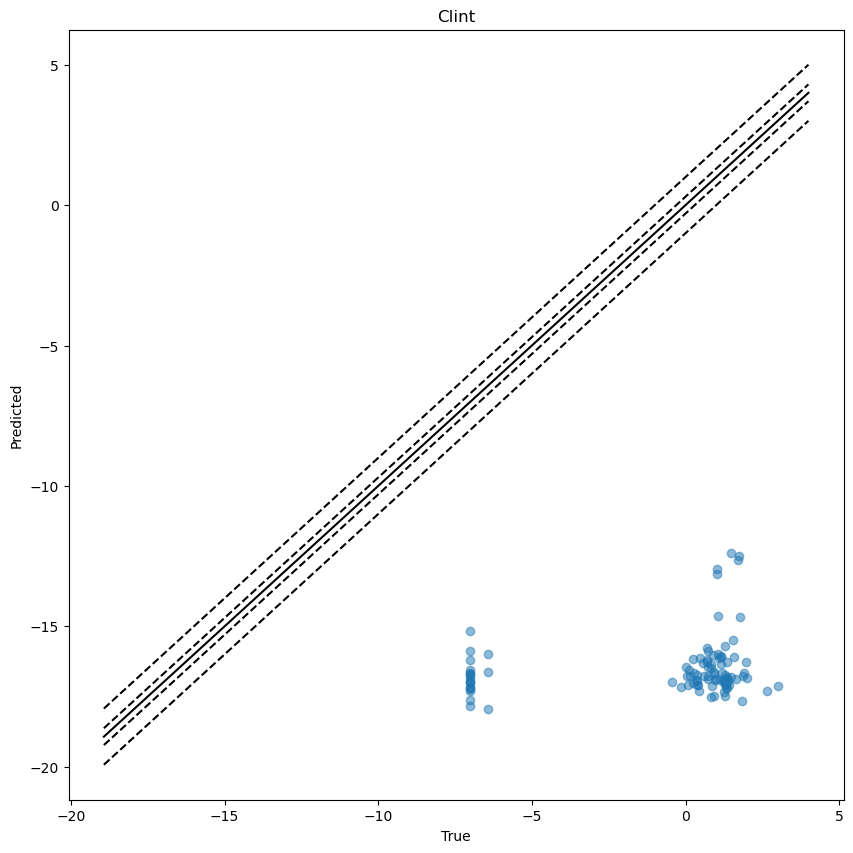

Property: FU
kendall_tau: 0.07476065182687143
rmse_overall: 1.142576813697815
mae_overall: 1.0782415866851807
within_03_overall: 0.010033444816053512
within_1_overall: 0.5217391304347826
R2: -10.65503393744623
Pearson: 0.08051926013878039


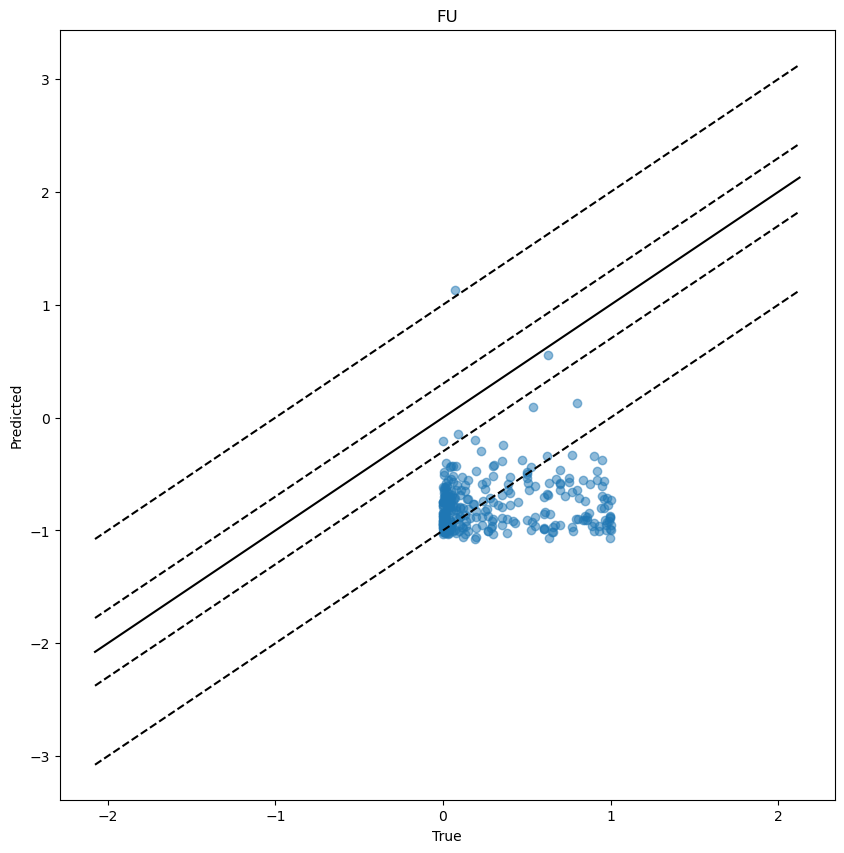

Property: LogHL
kendall_tau: 0.3079016715682623
rmse_overall: 16.668254852294922
mae_overall: 15.894965171813965
within_03_overall: 0.0
within_1_overall: 0.0
R2: -83.144167755393
Pearson: 0.4163439269021051


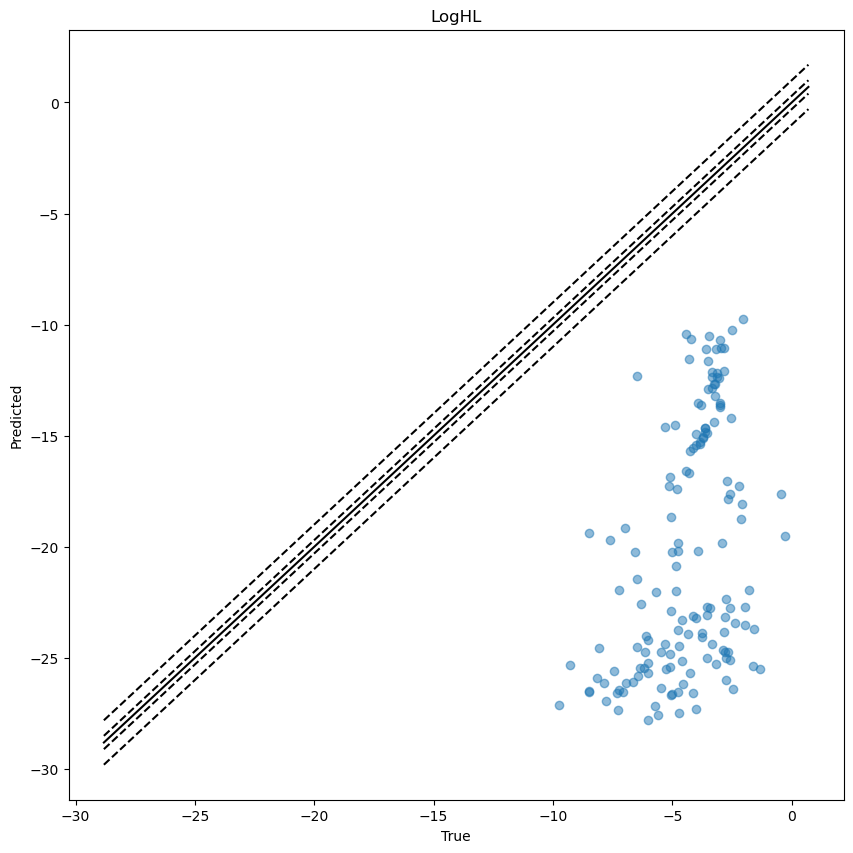

Property: LogKmHL
kendall_tau: 0.23256272808881126
rmse_overall: 5.333301067352295
mae_overall: 5.223912715911865
within_03_overall: 0.0
within_1_overall: 0.0
R2: -21.666011730516523
Pearson: 0.3905095785671071


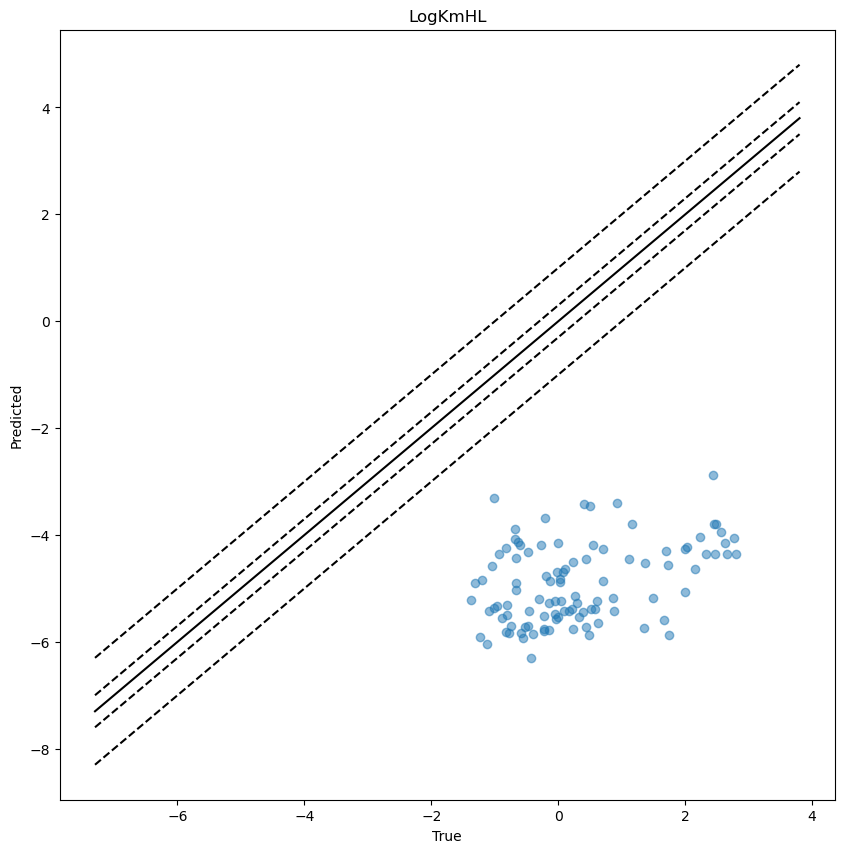

Property: LogKOA
kendall_tau: -0.06950308908302494
rmse_overall: 17.536479949951172
mae_overall: 17.109291076660156
within_03_overall: 0.0
within_1_overall: 0.0
R2: -37.50733201214521
Pearson: -0.18158132432871743


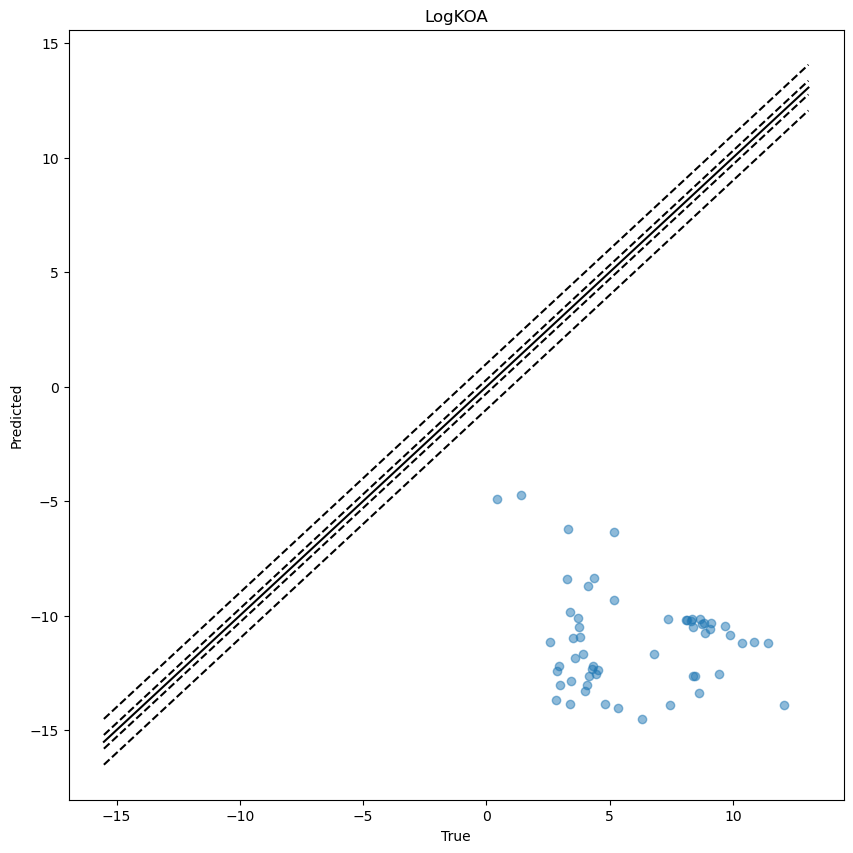

Property: LogKOC
kendall_tau: 0.05697865747100979
rmse_overall: 8.483441352844238
mae_overall: 8.332098960876465
within_03_overall: 0.0
within_1_overall: 0.0
R2: -43.49767441797191
Pearson: 0.06403645307685421


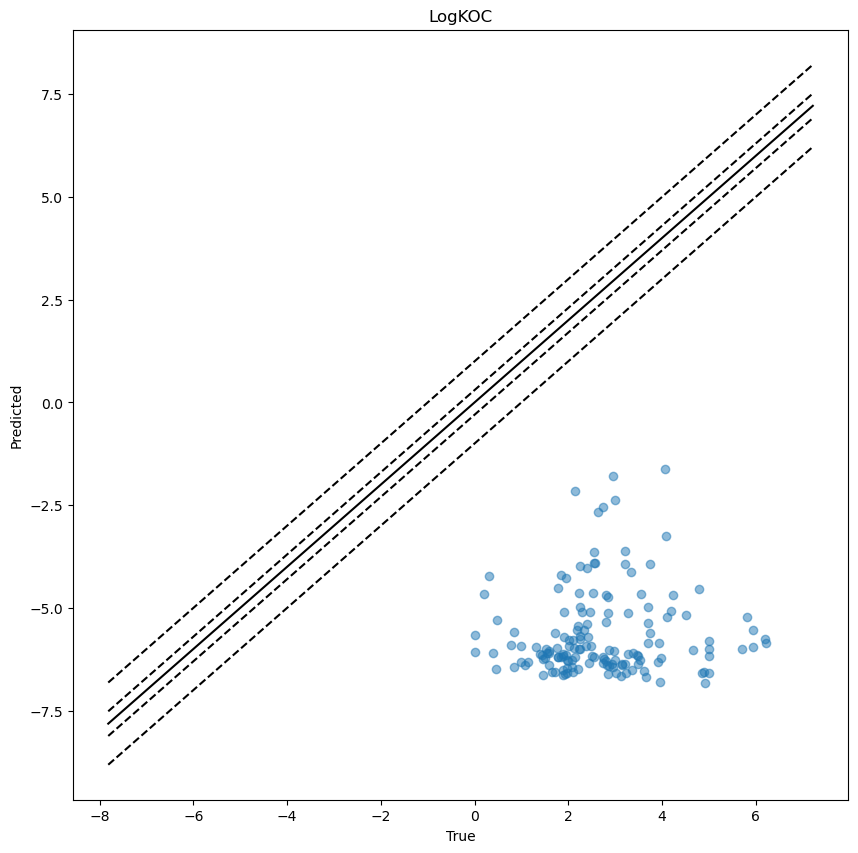

Property: MP
kendall_tau: -0.06827184815702027
rmse_overall: 579.7957153320312
mae_overall: 527.871826171875
within_03_overall: 0.0
within_1_overall: 0.0
R2: -31.829469432290715
Pearson: -0.07621886853830784


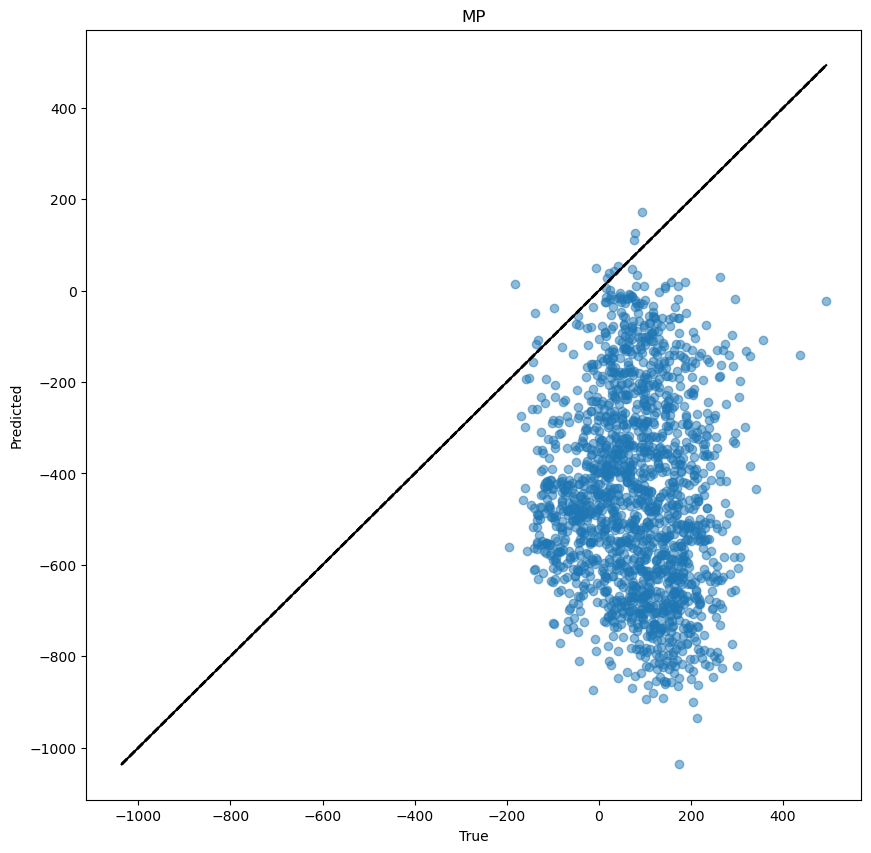

Property: LogMolar
kendall_tau: 0.11841316565263879
rmse_overall: 18.065364837646484
mae_overall: 17.199478149414062
within_03_overall: 0.000968054211035818
within_1_overall: 0.002904162633107454
R2: -59.435416524794114
Pearson: 0.053574388948482


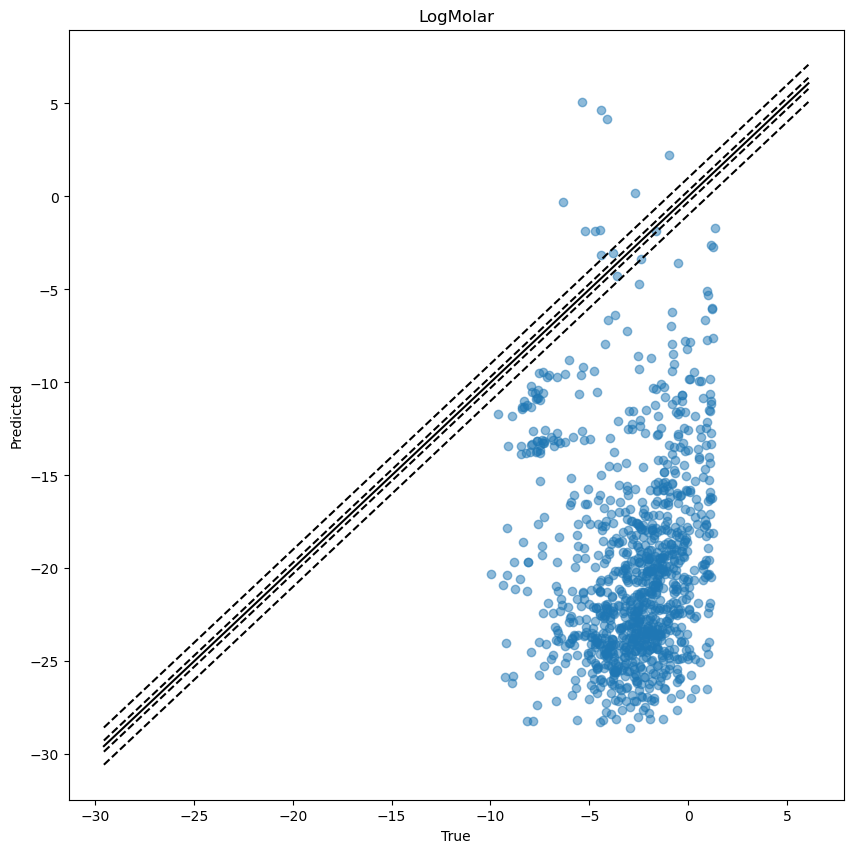

In [7]:
plot_scatters(df_preds, df_targets)